In [1]:
# PREDICTING PRICE OF PRE-OWNED CARS


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


In [4]:
cars_data=pd.read_csv('cars_sampled.csv' )


In [5]:
cars_data

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,3/4/2016 15:48,Suche_VW_T5_Multivan,private,request,0,test,bus,2005,NaN,0,transporter,150000,0,NaN,volkswagen,NaN,3/4/2016 0:00,29690,5/4/2016 15:16
49997,27/03/2016 14:55,Suche_einen_originalen_VW_Golf_2_Fire_and_Ice_G60,private,request,19999,control,NaN,1990,NaN,0,golf,5000,0,NaN,volkswagen,NaN,27/03/2016 0:00,50181,7/4/2016 11:45
49998,14/03/2016 18:51,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,private,request,0,test,coupe,2004,manual,0,3er,150000,1,petrol,bmw,no,14/03/2016 0:00,86956,25/03/2016 6:17
49999,15/03/2016 18:06,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,commercial,offer,100,control,station wagon,2000,manual,0,megane,150000,8,petrol,renault,NaN,15/03/2016 0:00,65232,6/4/2016 17:15


In [6]:
cars=cars_data.copy()

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [8]:
cars.describe()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [9]:
pd.set_option('display.max_columns', 500)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [10]:
col=['name','dateCrawled','dateCreated','postalCode','lastSeen']
cars=cars.drop(columns=col, axis=1)

In [11]:
cars.drop_duplicates(keep='first',inplace=True)

In [12]:
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

<AxesSubplot:xlabel='yearOfRegistration', ylabel='price'>

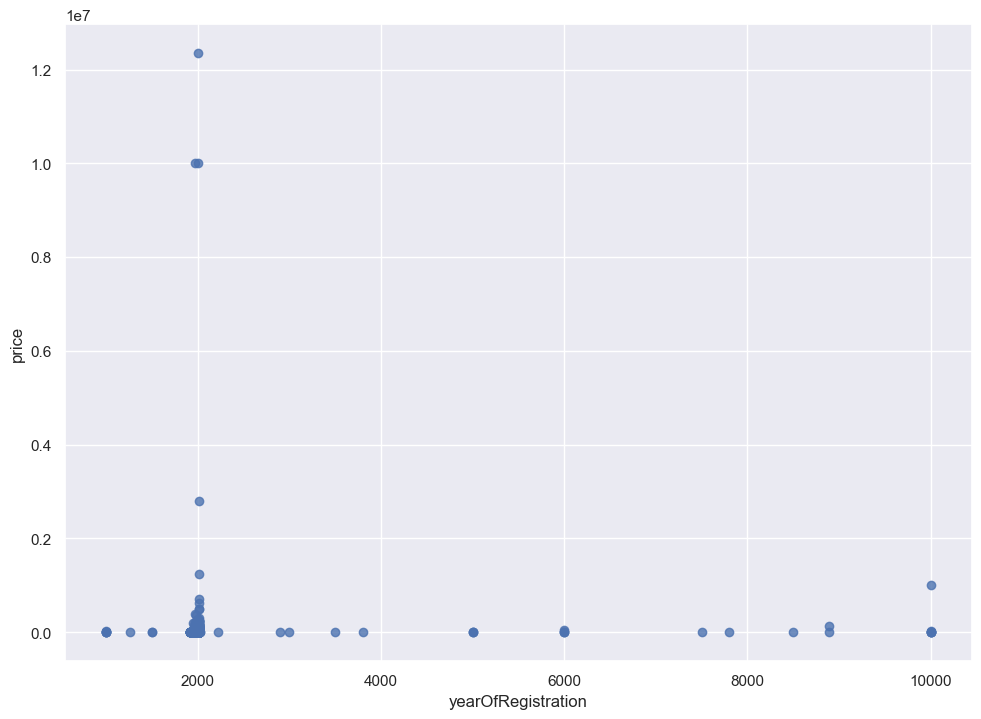

In [13]:
yearwise_count=cars['yearOfRegistration'].value_counts().sort_index()
sum(cars['yearOfRegistration'] > 2018)
sum(cars['yearOfRegistration'] < 1950)
sns.regplot(x='yearOfRegistration', y='price', scatter=True, 
            fit_reg=False, data=cars)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1748

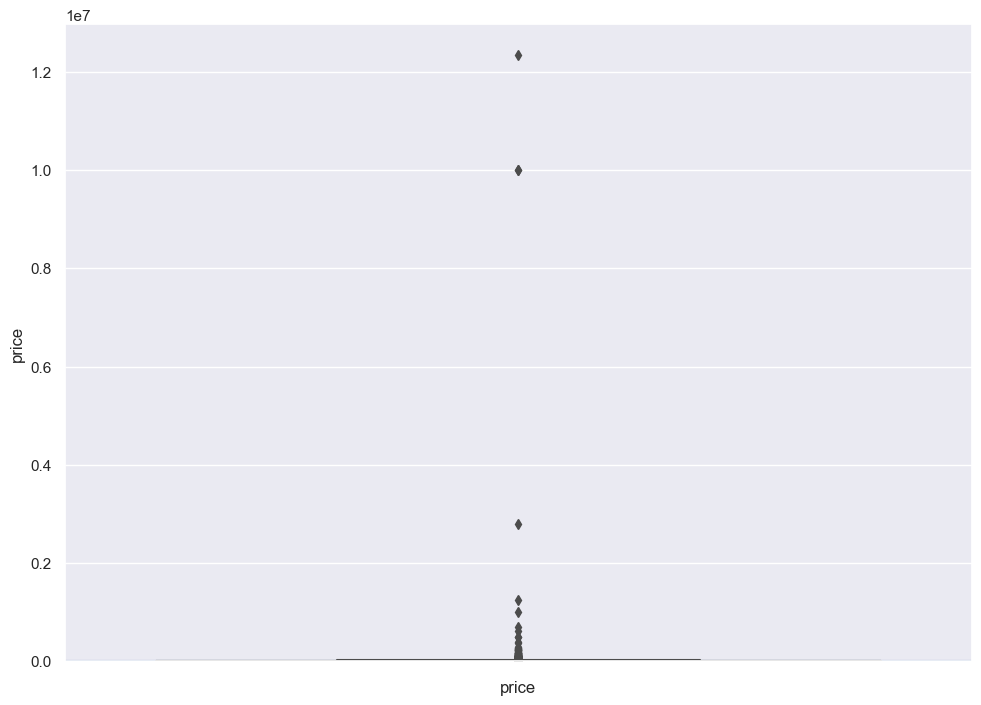

In [14]:
# Variable price
price_count=cars['price'].value_counts().sort_index()
sns.distplot(cars['price'])
cars['price'].describe()
sns.boxplot(y=cars['price'])
sum(cars['price'] > 150000)
sum(cars['price'] < 100)
# Working range- 100 and 150000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


5565

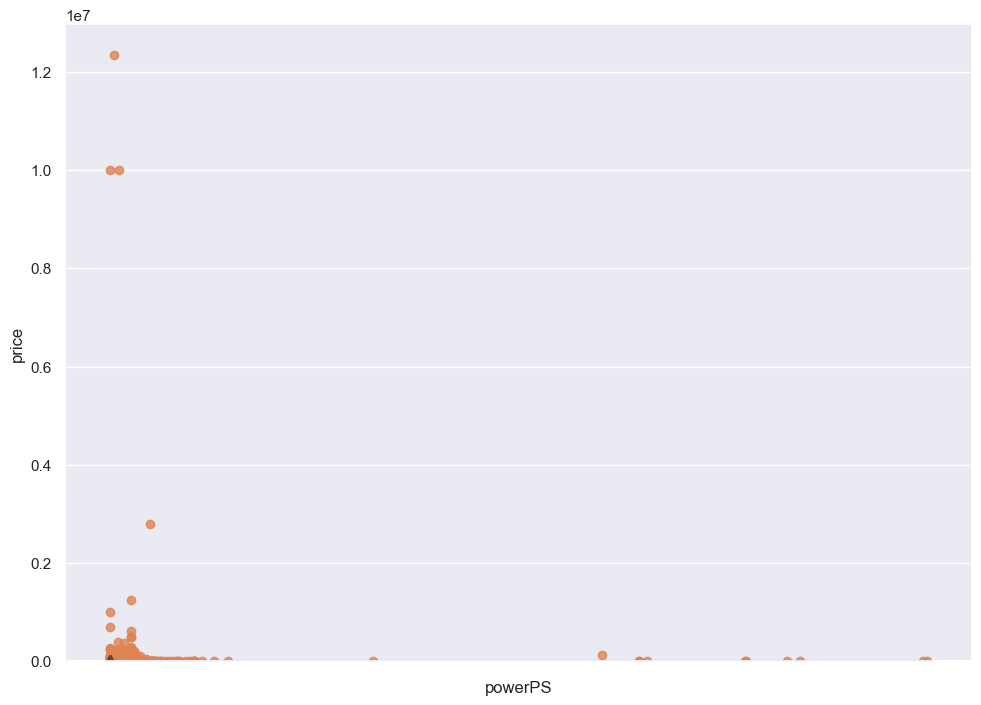

In [15]:
# Variable powerPS
power_count=cars['powerPS'].value_counts().sort_index()
sns.distplot(cars['powerPS'])
cars['powerPS'].describe()
sns.boxplot(y=cars['powerPS'])
sns.regplot(x='powerPS', y='price', scatter=True, 
            fit_reg=False, data=cars)
sum(cars['powerPS'] > 500)
sum(cars['powerPS'] < 10)
# Working range- 10 and 500

In [16]:
# Working range of data

cars = cars[
        (cars.yearOfRegistration <= 2018) 
      & (cars.yearOfRegistration >= 1950) 
      & (cars.price >= 100) 
      & (cars.price <= 150000) 
      & (cars.powerPS >= 10) 
      & (cars.powerPS <= 500)]
# ~6700 records are dropped

In [17]:
# Further to simplify- variable reduction
# Combining yearOfRegistration and monthOfRegistration

cars['monthOfRegistration']/=12

# Creating new varible Age by adding yearOfRegistration and monthOfRegistration
cars['Age']=(2018-cars['yearOfRegistration'])+cars['monthOfRegistration']
cars['Age']=round(cars['Age'],2)
cars['Age'].describe()


count   42772.000
mean       14.873
std         7.093
min         0.000
25%        10.330
50%        14.830
75%        19.170
max        67.750
Name: Age, dtype: float64

In [18]:
# Dropping yearOfRegistration and monthOfRegistration
cars=cars.drop(columns=['yearOfRegistration','monthOfRegistration'], axis=1)



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='powerPS', ylabel='price'>

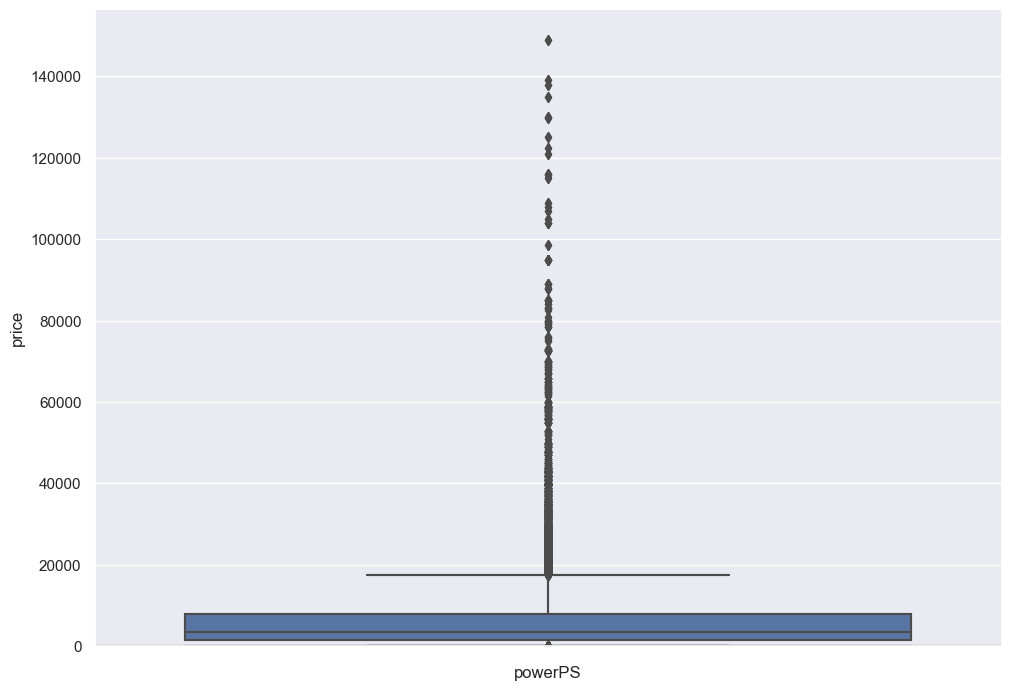

In [19]:
# Visualizing parameters 

# Age
sns.distplot(cars['Age'])
sns.boxplot(y=cars['Age'])

# price
sns.distplot(cars['price'])
sns.boxplot(y=cars['price'])

# powerPS
sns.distplot(cars['powerPS'])
sns.boxplot(y=cars['price'])

<AxesSubplot:xlabel='Age', ylabel='price'>

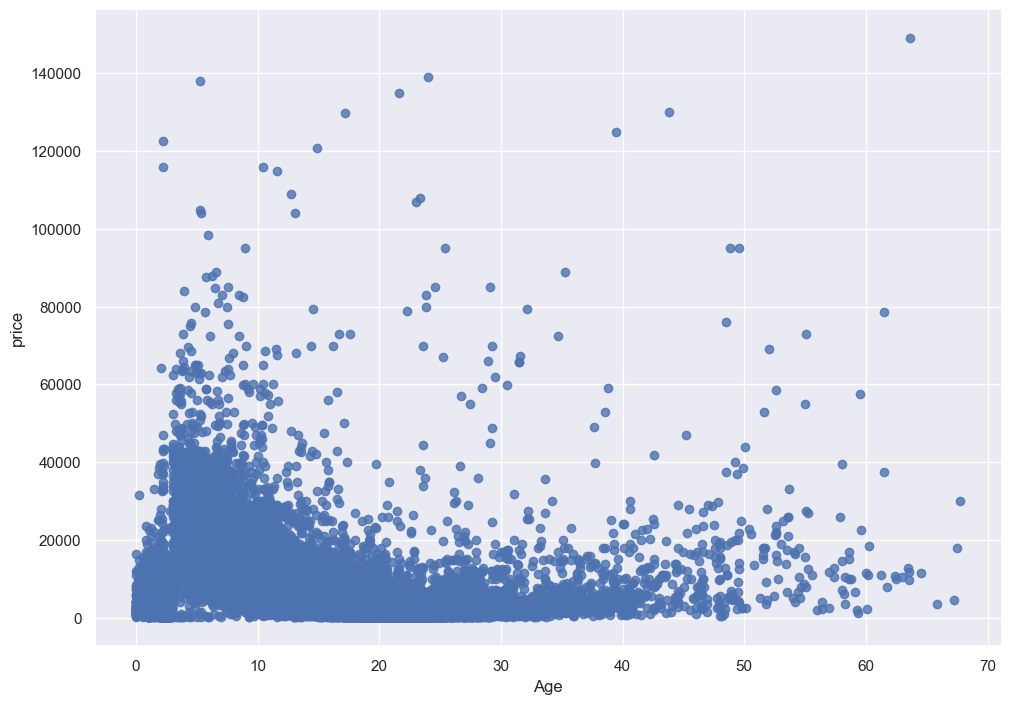

In [20]:
# Visualizing parameters after narrowing working range
# Age vs price
sns.regplot(x='Age', y='price', scatter=True, 
            fit_reg=False, data=cars)

<AxesSubplot:xlabel='powerPS', ylabel='price'>

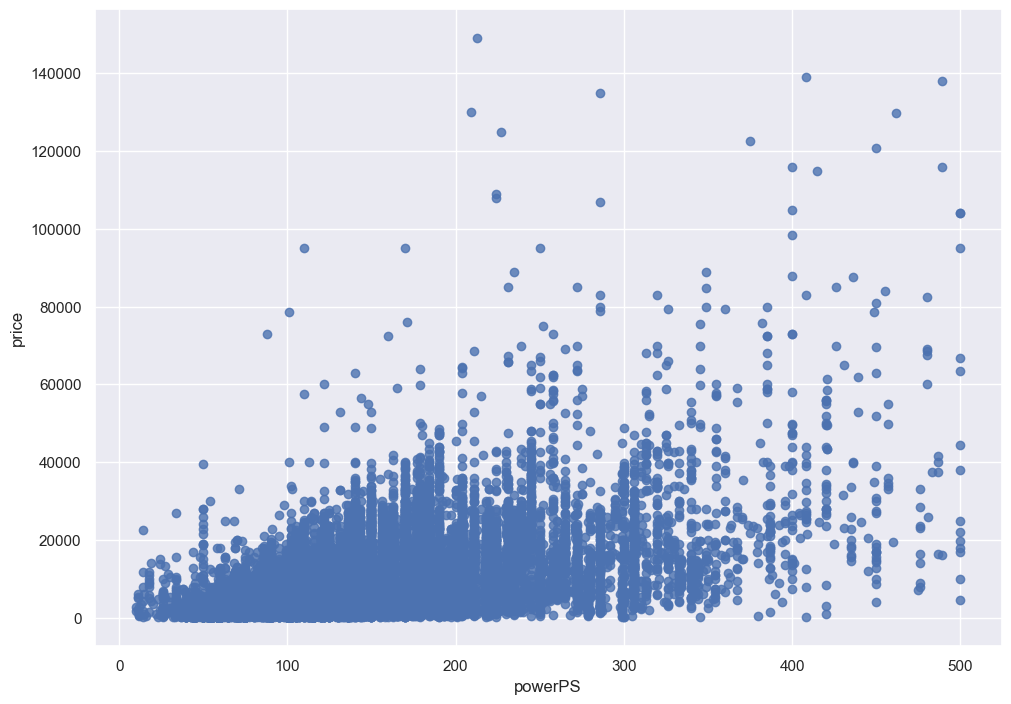

In [21]:
# powerPS vs price
sns.regplot(x='powerPS', y='price', scatter=True, 
            fit_reg=False, data=cars)


<AxesSubplot:xlabel='seller', ylabel='count'>

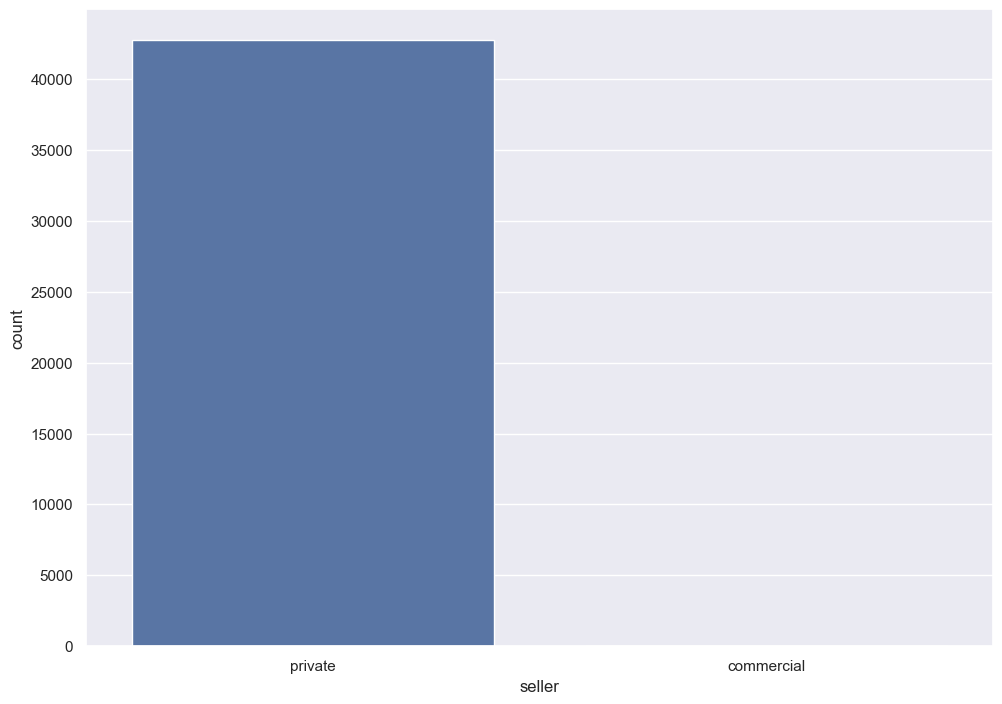

In [22]:
# Variable seller
cars['seller'].value_counts()
pd.crosstab(cars['seller'],columns='count',normalize=True)
sns.countplot(x= 'seller',data=cars)
# Fewer cars have 'commercial'=> Insignificant



<AxesSubplot:xlabel='offerType', ylabel='count'>

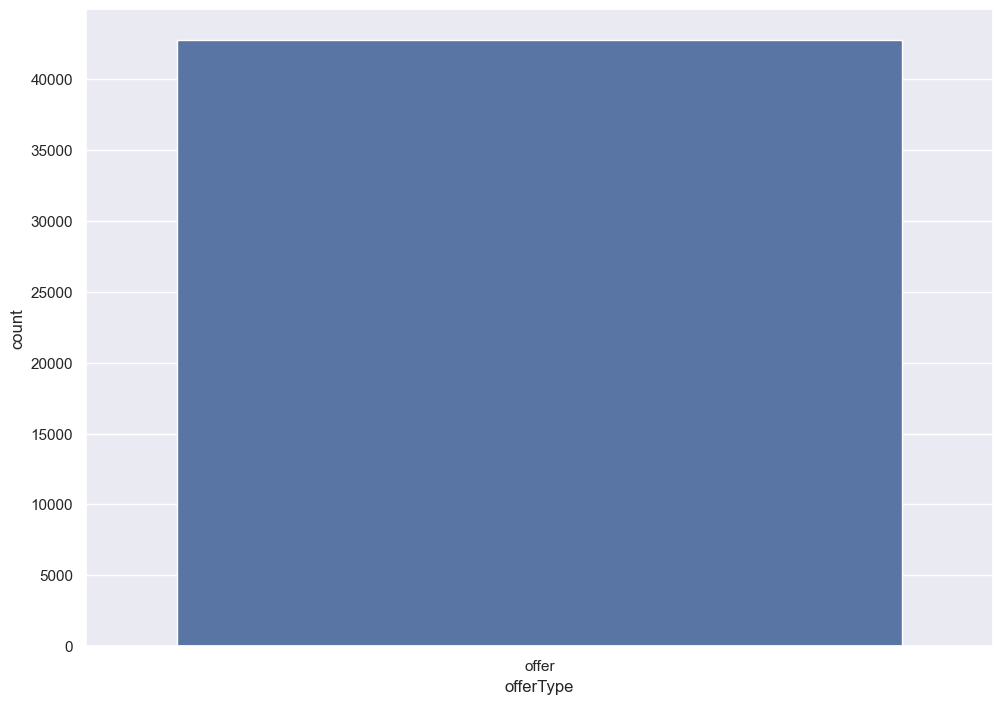

In [23]:
# Variable offerType
cars['offerType'].value_counts()
sns.countplot(x= 'offerType',data=cars)
# All cars have 'offer'=> Insignificant


<AxesSubplot:xlabel='abtest', ylabel='price'>

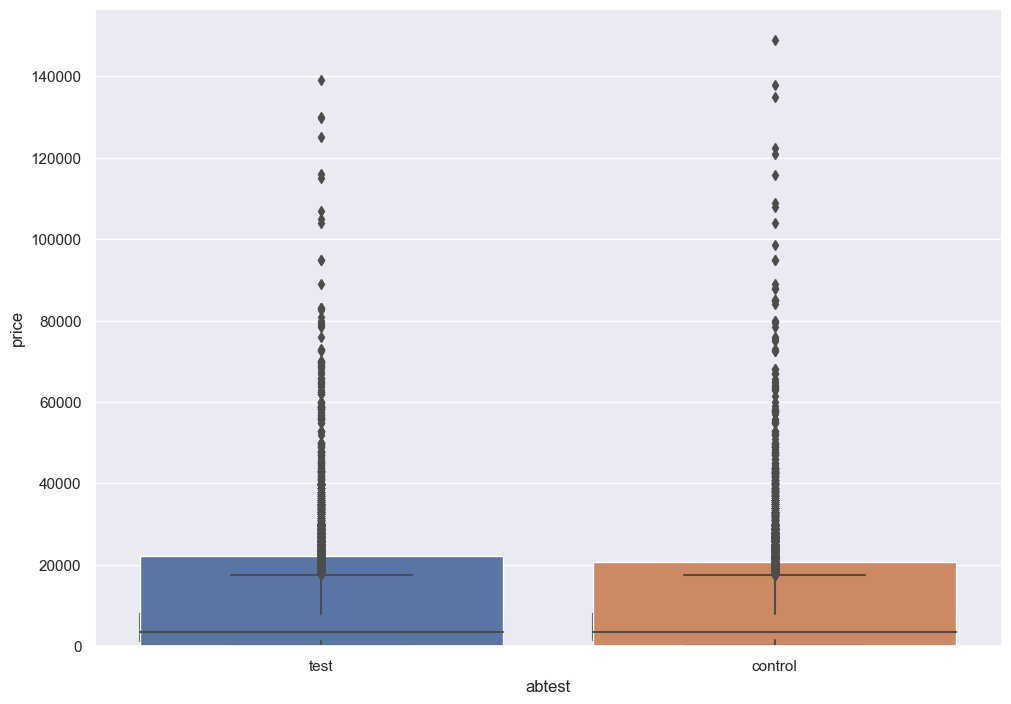

In [24]:
# Variable abtest
cars['abtest'].value_counts()
pd.crosstab(cars['abtest'],columns='count',normalize=True)
sns.countplot(x= 'abtest',data=cars)
# Equally distributed
sns.boxplot(x= 'abtest',y='price',data=cars)
# For every price value there is almost 50-50 distribution
# Does not affect price => Insignificant


<AxesSubplot:xlabel='vehicleType', ylabel='price'>

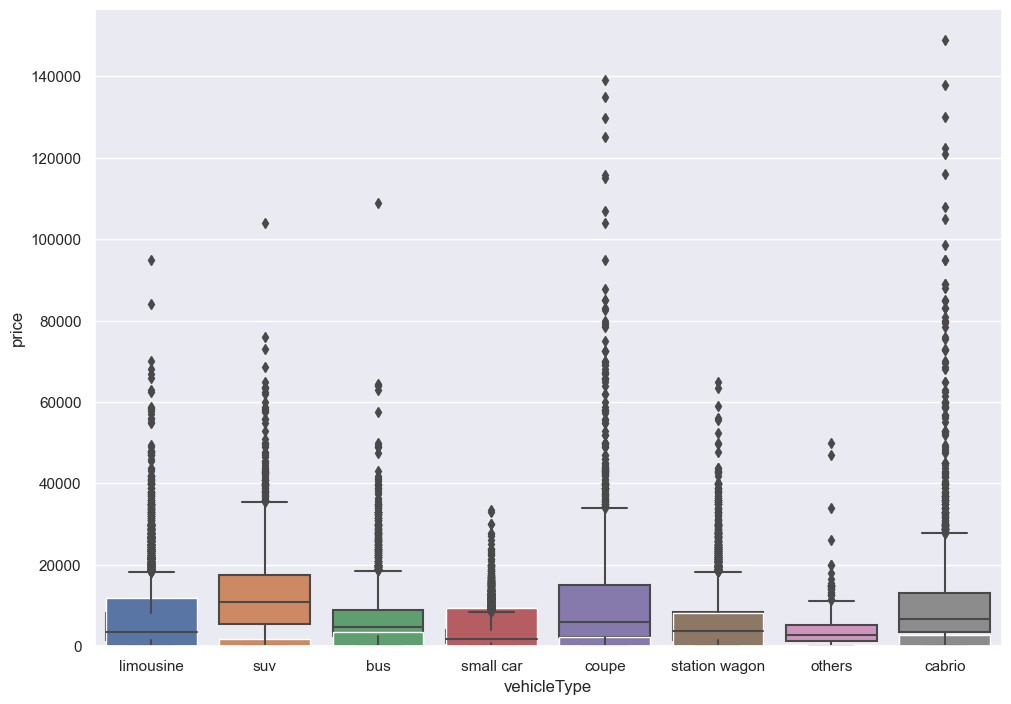

In [25]:
# Variable vehicleType
cars['vehicleType'].value_counts()
pd.crosstab(cars['vehicleType'],columns='count',normalize=True)
sns.countplot(x= 'vehicleType',data=cars)
sns.boxplot(x= 'vehicleType',y='price',data=cars)
# 8 types- limousine, small cars and station wagons max freq
# vehicleType affects price 


<AxesSubplot:xlabel='gearbox', ylabel='price'>

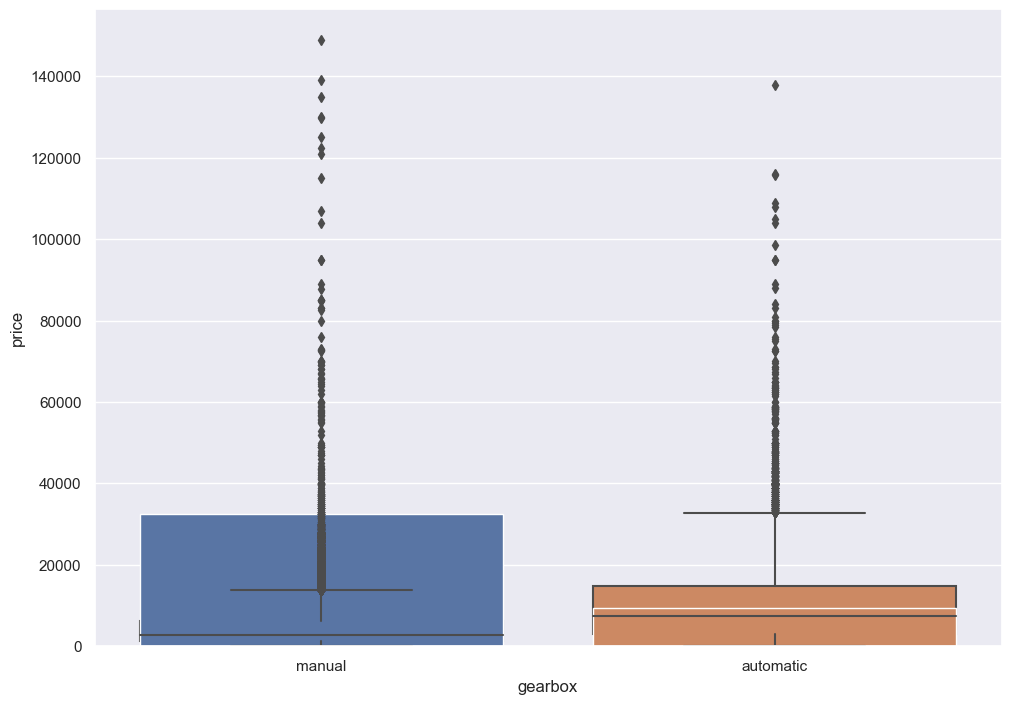

In [26]:
# Variable gearbox
cars['gearbox'].value_counts()
pd.crosstab(cars['gearbox'],columns='count',normalize=True)
sns.countplot(x= 'gearbox',data=cars)
sns.boxplot(x= 'gearbox',y='price',data=cars)
# gearbox affects price 

<AxesSubplot:xlabel='model', ylabel='price'>

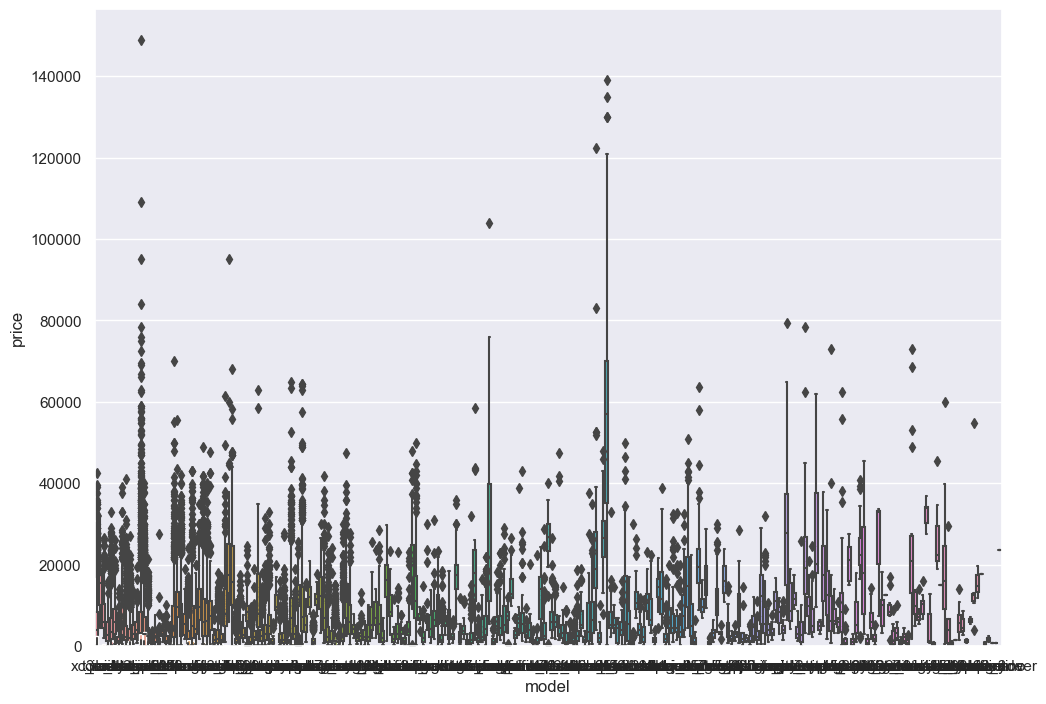

In [27]:
# Variable model
cars['model'].value_counts()
pd.crosstab(cars['model'],columns='count',normalize=True)
sns.countplot(x= 'model',data=cars)
sns.boxplot(x= 'model',y='price',data=cars)
# Cars are distributed over many models
# Considered in modelling


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='kilometer', ylabel='price'>

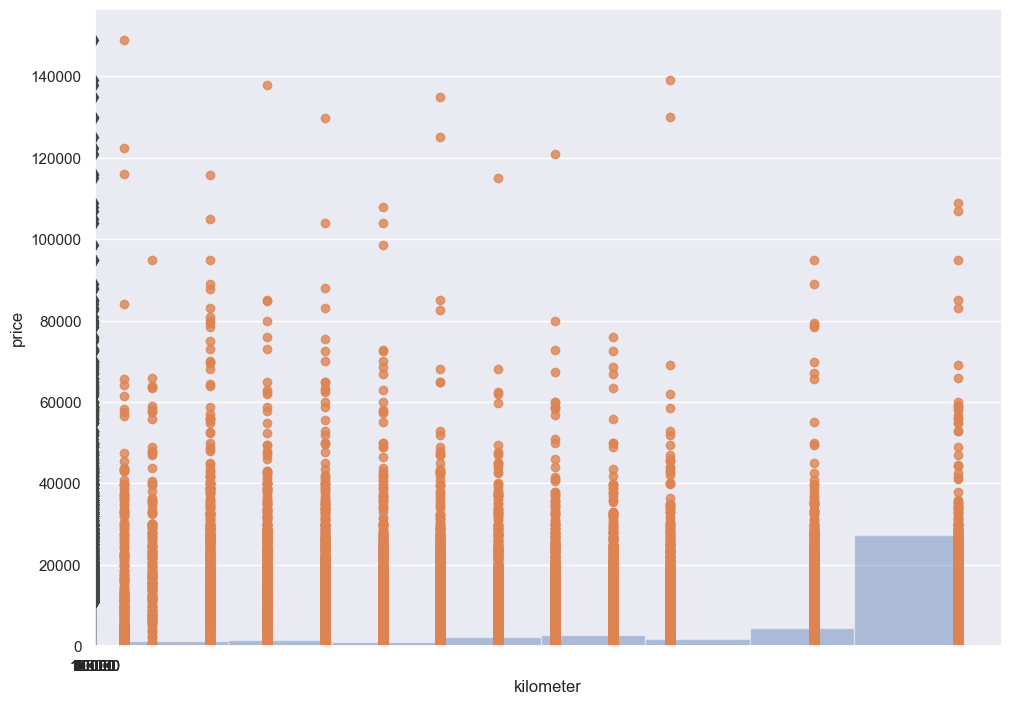

In [28]:
# Variable kilometer
cars['kilometer'].value_counts().sort_index()
pd.crosstab(cars['kilometer'],columns='count',normalize=True)
sns.boxplot(x= 'kilometer',y='price',data=cars)
cars['kilometer'].describe()
sns.distplot(cars['kilometer'],bins=8 ,kde=False)
sns.regplot(x='kilometer', y='price', scatter=True, 
            fit_reg=False, data=cars)
# Considered in modelling


<AxesSubplot:xlabel='fuelType', ylabel='price'>

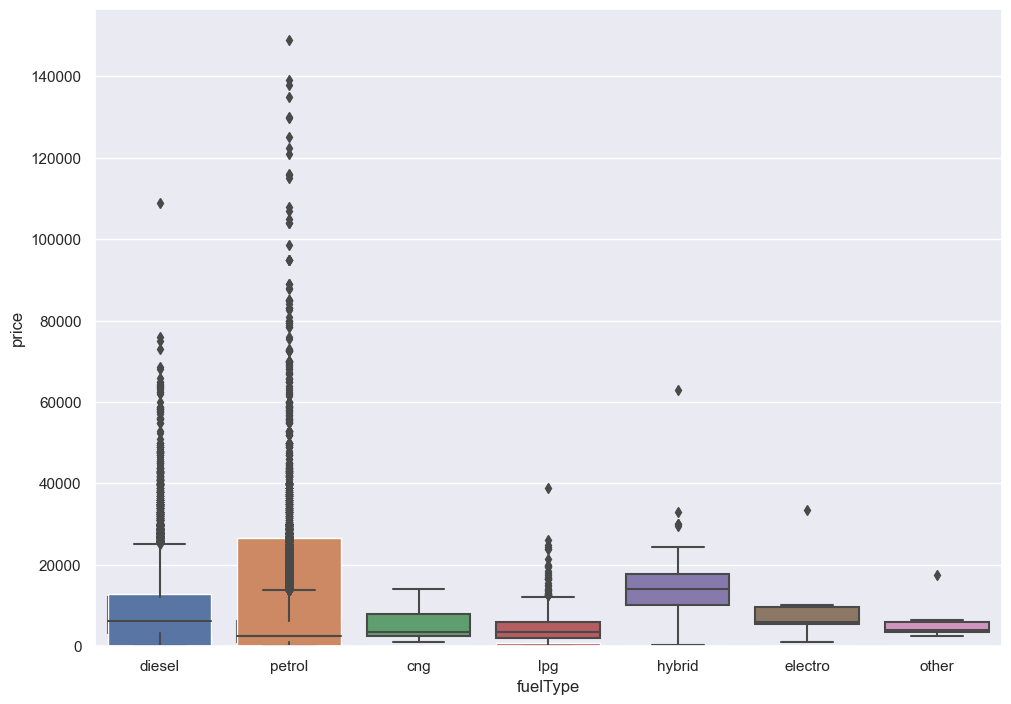

In [29]:
# Variable fuelType
cars['fuelType'].value_counts()
pd.crosstab(cars['fuelType'],columns='count',normalize=True)
sns.countplot(x= 'fuelType',data=cars)
sns.boxplot(x= 'fuelType',y='price',data=cars)
# fuelType affects price


<AxesSubplot:xlabel='brand', ylabel='price'>

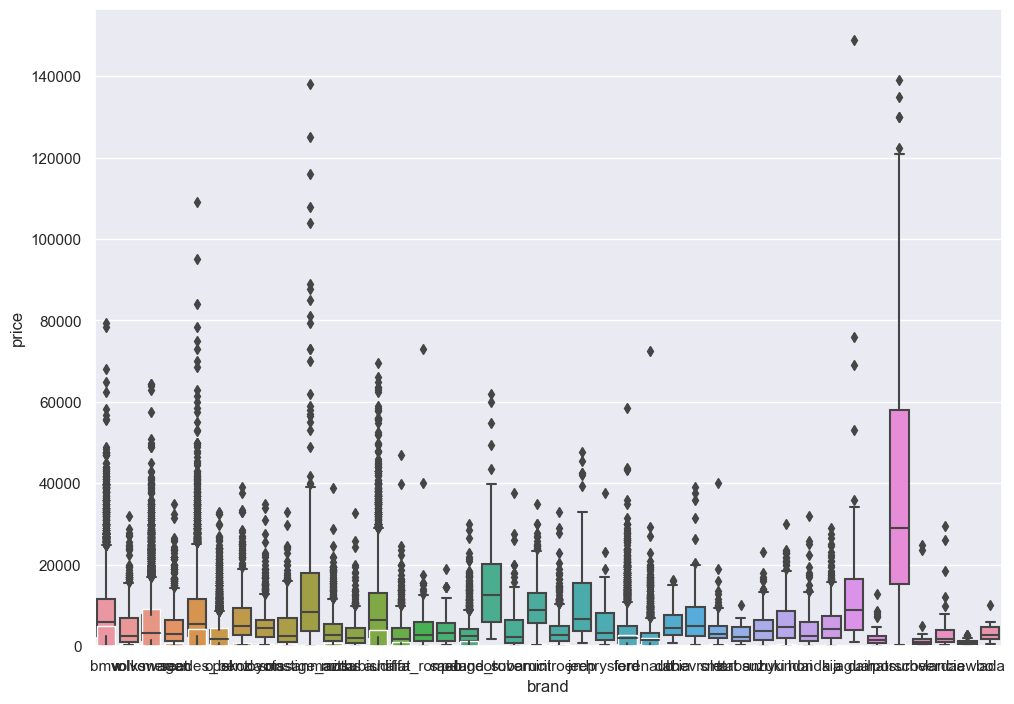

In [30]:
# Variable brand
cars['brand'].value_counts()
pd.crosstab(cars['brand'],columns='count',normalize=True)
sns.countplot(x= 'brand',data=cars)
sns.boxplot(x= 'brand',y='price',data=cars)
# Cars are distributed over many brands
# Considered for modelling 

<AxesSubplot:xlabel='notRepairedDamage', ylabel='price'>

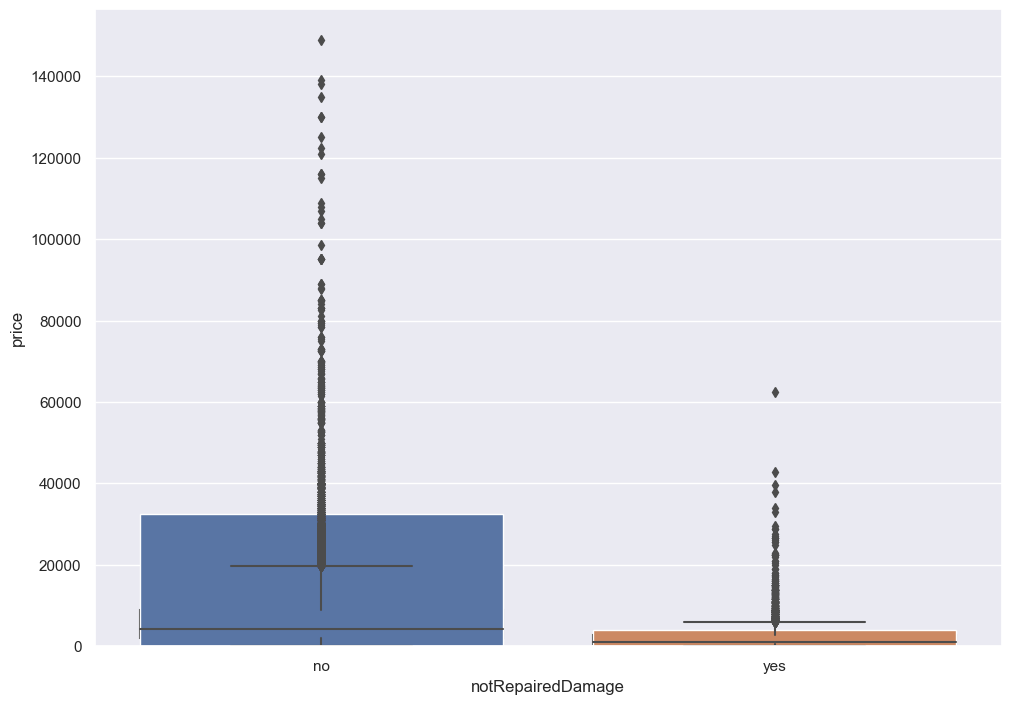

In [31]:
# Variable notRepairedDamage
# yes- car is damaged but not rectified
# no- car was damaged but has been rectified
cars['notRepairedDamage'].value_counts()
pd.crosstab(cars['notRepairedDamage'],columns='count',normalize=True)
sns.countplot(x= 'notRepairedDamage',data=cars)
sns.boxplot(x= 'notRepairedDamage',y='price',data=cars)
# As expected, the cars that require the damages to be repaired
# fall under lower price ranges

In [32]:
# Removing insignificant variables
# =============================================================================

col=['seller','offerType','abtest']
cars=cars.drop(columns=col, axis=1)
cars_copy=cars.copy()


In [33]:
# Correlation
# =============================================================================

cars_select1=cars.select_dtypes(exclude=[object])
correlation=cars_select1.corr()
round(correlation,3)   
cars_select1.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]                          


powerPS     0.575
kilometer   0.440
Age         0.336
Name: price, dtype: float64

In [34]:
"""
We are going to build a Linear Regression and Random Forest model
on two sets of data.
1. Data obtained by omitting rows with any missing value
2. Data obtained by imputing the missing values 
"""


'\nWe are going to build a Linear Regression and Random Forest model\non two sets of data.\n1. Data obtained by omitting rows with any missing value\n2. Data obtained by imputing the missing values \n'

In [35]:
# OMITTING MISSING VALUES
# =============================================================================

cars_omit=cars.dropna(axis=0)

In [36]:
# Converting categorical variables to dummy variables
cars_omit=pd.get_dummies(cars_omit,drop_first=True) 


In [37]:
# IMPORTING NECESSARY LIBRARIES
# =============================================================================

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [38]:
# MODEL BUILDING WITH OMITTED DATA
# =============================================================================

# Separating input and output features
x1 = cars_omit.drop(['price'], axis='columns', inplace=False)
y1 = cars_omit['price']


In [39]:
x1

,powerPS,kilometer,Age,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_others,vehicleType_small car,vehicleType_station wagon,vehicleType_suv,gearbox_manual,model_147,model_156,model_159,model_1_reihe,model_1er,model_200,model_2_reihe,model_300c,model_3_reihe,model_3er,model_4_reihe,model_500,model_5_reihe,model_5er,model_601,model_6_reihe,model_6er,model_7er,model_80,model_850,model_90,model_900,model_9000,model_911,model_a1,model_a2,model_a3,model_a4,model_a5,model_a6,model_a8,model_a_klasse,model_accord,model_agila,model_alhambra,model_almera,model_altea,model_amarok,model_antara,model_arosa,model_astra,model_auris,model_avensis,model_aveo,model_aygo,model_b_klasse,model_b_max,model_beetle,model_berlingo,model_bora,model_boxster,model_bravo,model_c1,model_c2,model_c3,model_c4,model_c5,model_c_klasse,model_c_max,model_c_reihe,model_caddy,model_calibra,model_captiva,model_carisma,model_carnival,model_cayenne,model_cc,model_ceed,model_charade,model_cherokee,model_citigo,model_civic,model_cl,model_clio,model_clk,model_clubman,model_colt,model_combo,model_cooper,model_cordoba,model_corolla,model_corsa,model_cr_reihe,model_croma,model_crossfire,model_cuore,model_cx_reihe,model_defender,model_delta,model_discovery,model_doblo,model_ducato,model_duster,model_e_klasse,model_eos,model_escort,model_espace,model_exeo,model_fabia,model_fiesta,model_focus,model_forester,model_forfour,model_fortwo,model_fox,model_freelander,model_fusion,model_g_klasse,model_galant,model_galaxy,model_getz,model_gl,model_glk,model_golf,model_grand,model_i3,model_i_reihe,model_ibiza,model_impreza,model_insignia,model_jazz,model_jetta,model_jimny,model_juke,model_justy,model_ka,model_kadett,model_kaefer,model_kalina,model_kalos,model_kangoo,model_kuga,model_laguna,model_lancer,model_lanos,model_legacy,model_leon,model_lodgy,model_logan,model_lupo,model_lybra,model_m_klasse,model_m_reihe,model_materia,model_matiz,model_megane,model_meriva,model_micra,model_mii,model_modus,model_mondeo,model_move,model_musa,model_mustang,model_mx_reihe,model_navara,model_niva,model_note,model_nubira,model_octavia,model_omega,model_one,model_others,model_outlander,model_pajero,model_panda,model_passat,model_phaeton,model_picanto,model_polo,model_primera,model_ptcruiser,model_punto,model_q3,model_q5,model_q7,model_qashqai,model_r19,model_range_rover,model_range_rover_evoque,model_range_rover_sport,model_rangerover,model_rav,model_rio,model_roadster,model_roomster,model_rx_reihe,model_s60,model_s_klasse,model_s_max,model_s_type,model_sandero,model_santa,model_scenic,model_scirocco,model_seicento,model_serie_2,model_serie_3,model_sharan,model_signum,model_sirion,model_sl,model_slk,model_sorento,model_spark,model_spider,model_sportage,model_sprinter,model_stilo,model_superb,model_swift,model_terios,model_tigra,model_tiguan,model_toledo,model_touareg,model_touran,model_transit,model_transporter,model_tt,model_tucson,model_twingo,model_up,model_v40,model_v50,model_v60,model_v70,model_v_klasse,model_vectra,model_verso,model_viano,model_vito,model_vivaro,model_voyager,model_wrangler,model_x_reihe,model_x_trail,model_x_type,model_xc_reihe,model_yaris,model_yeti,model_ypsilon,model_z_reihe,model_zafira,fuelType_diesel,fuelType_electro,fuelType_hybrid,fuelType_lpg,fuelType_other,fuelType_petrol,brand_audi,brand_bmw,brand_chevrolet,brand_chrysler,brand_citroen,brand_dacia,brand_daewoo,brand_daihatsu,brand_fiat,brand_ford,brand_honda,brand_hyundai,brand_jaguar,brand_jeep,brand_kia,brand_lada,brand_lancia,brand_land_rover,brand_mazda,brand_mercedes_benz,brand_mini,brand_mitsubishi,brand_nissan,brand_opel,brand_peugeot,brand_porsche,brand_renault,brand_rover,brand_saab,brand_seat,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_yes
1,163,150000,13.500,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [40]:
y1

1        13299
3         4500
4        18750
5          988
7         1399
         ...  
49991    10900
49992      790
49993      830
49995     2290
50000     1100
Name: price, Length: 32884, dtype: int64

array([[<AxesSubplot:title={'center':'1. Before'}>,
        <AxesSubplot:title={'center':'2. After'}>]], dtype=object)

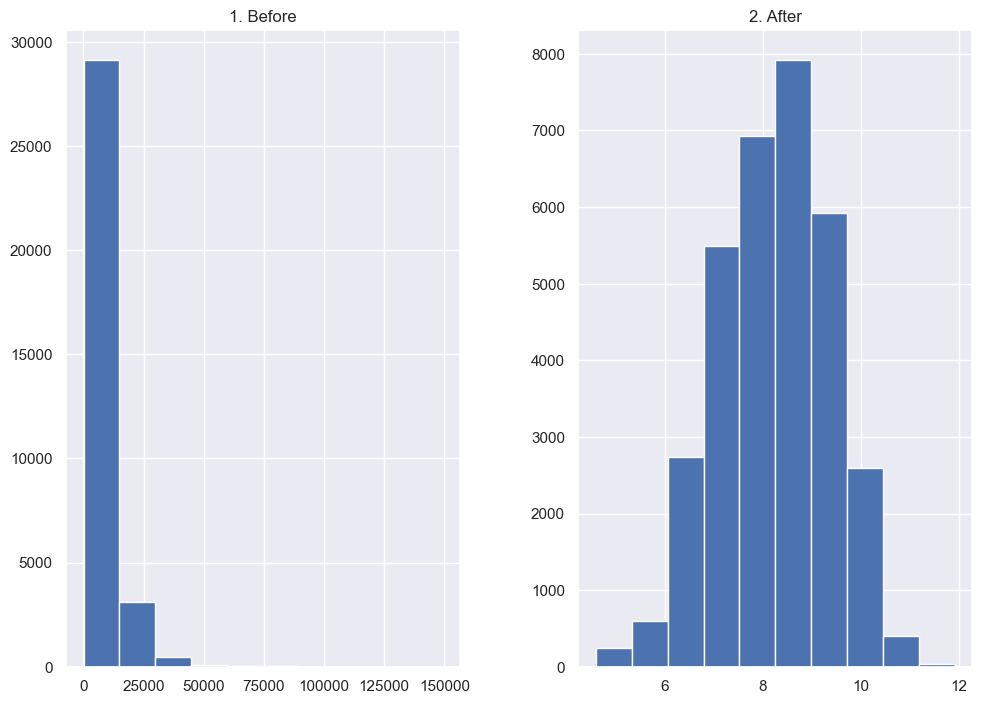

In [41]:
# Plotting the variable price
prices = pd.DataFrame({"1. Before":y1, "2. After":np.log(y1)})
prices.hist()


In [42]:
# Transforming price as a logarithmic value
y1 = np.log(y1)


In [43]:
# Splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state = 3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(23018, 300) (9866, 300) (23018,) (9866,)


In [44]:
# BASELINE MODEL FOR OMITTED DATA
# =============================================================================

"""
We are making a base model by using test data mean value
This is to set a benchmark and to compare with our regression model
"""


'\nWe are making a base model by using test data mean value\nThis is to set a benchmark and to compare with our regression model\n'

In [45]:
# finding the mean for test data value
base_pred = np.mean(y_test)
print(base_pred)


8.249615787653267


In [46]:
# Repeating same value till length of test data
base_pred = np.repeat(base_pred, len(y_test))


In [47]:
# finding the RMSE
base_root_mean_square_error = np.sqrt(mean_squared_error(y_test, base_pred))
                               
print(base_root_mean_square_error)

1.1274483657478247


In [48]:
# LINEAR REGRESSION WITH OMITTED DATA

In [49]:
# Setting intercept as true
lgr=LinearRegression(fit_intercept=True)


In [50]:
# Model
model_lin1=lgr.fit(X_train,y_train)


In [51]:
# Predicting model on test set
cars_predictions_lin1 = lgr.predict(X_test)


In [52]:
# Computing MSE and RMSE
lin_mse1 = mean_squared_error(y_test, cars_predictions_lin1)
lin_rmse1 = np.sqrt(lin_mse1)
print(lin_rmse1)

0.5455481266513819


In [53]:
# R squared value
r2_lin_test1=model_lin1.score(X_test,y_test)
r2_lin_train1=model_lin1.score(X_train,y_train)
print(r2_lin_test1,r2_lin_train1)


0.7658615091649262 0.7800936978183916


count   9866.000
mean       0.003
std        0.546
min       -5.796
25%       -0.261
50%        0.041
75%        0.302
max        4.547
Name: price, dtype: float64

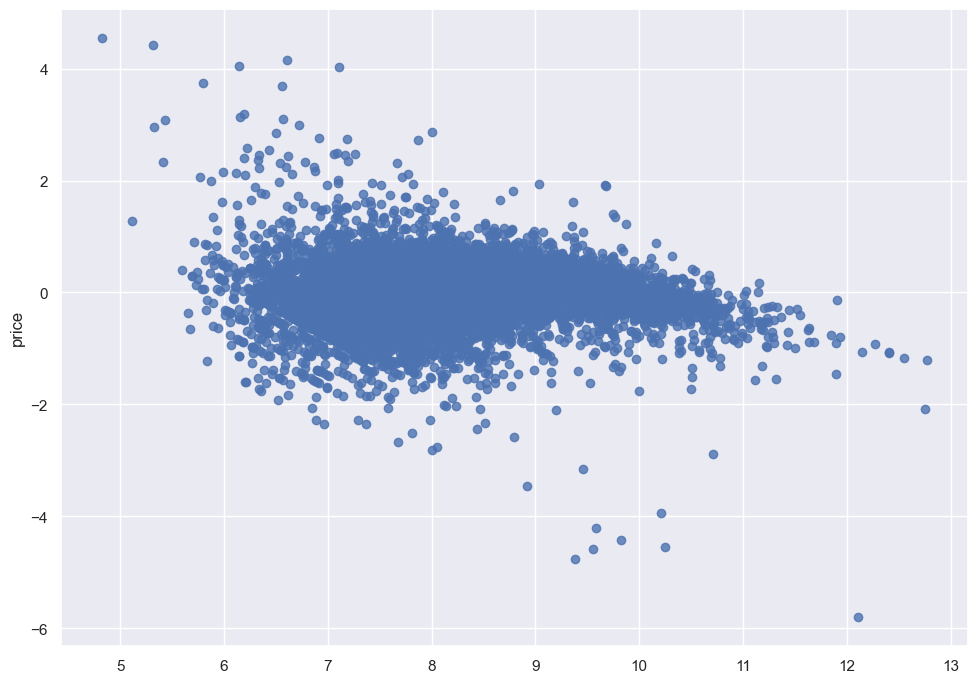

In [54]:
# Regression diagnostics- Residual plot analysis
residuals1=y_test-cars_predictions_lin1
sns.regplot(x=cars_predictions_lin1, y=residuals1, scatter=True, 
            fit_reg=False)
residuals1.describe()

In [55]:
# RANDOM FOREST WITH OMITTED DATA

In [56]:
# Model parameters
rf = RandomForestRegressor(n_estimators = 100,max_features='auto',
                           max_depth=100,min_samples_split=10,
                           min_samples_leaf=4,random_state=1)


In [57]:
# Model
model_rf1=rf.fit(X_train,y_train)


In [58]:
# Predicting model on test set
cars_predictions_rf1 = rf.predict(X_test)


In [59]:
# Computing MSE and RMSE
rf_mse1 = mean_squared_error(y_test, cars_predictions_rf1)
rf_rmse1 = np.sqrt(rf_mse1)
print(rf_rmse1)

0.4360736289370223


In [60]:
# R squared value
r2_rf_test1=model_rf1.score(X_test,y_test)
r2_rf_train1=model_rf1.score(X_train,y_train)
print(r2_rf_test1,r2_rf_train1)   


0.8504018147750623 0.9202494705146291


In [61]:
# MODEL BUILDING WITH IMPUTED DATA

In [62]:
cars_imputed = cars.apply(lambda x:x.fillna(x.median()) \
                  if x.dtype=='float' else \
                  x.fillna(x.value_counts().index[0]))
cars_imputed.isnull().sum()


price                0
vehicleType          0
gearbox              0
powerPS              0
model                0
kilometer            0
fuelType             0
brand                0
notRepairedDamage    0
Age                  0
dtype: int64

In [63]:
# Converting categorical variables to dummy variables
cars_imputed=pd.get_dummies(cars_imputed,drop_first=True) 


In [64]:
# Separating input and output feature
x2 = cars_imputed.drop(['price'], axis='columns', inplace=False)
y2 = cars_imputed['price']


In [65]:
x2

,powerPS,kilometer,Age,vehicleType_cabrio,vehicleType_coupe,vehicleType_limousine,vehicleType_others,vehicleType_small car,vehicleType_station wagon,vehicleType_suv,gearbox_manual,model_145,model_147,model_156,model_159,model_1_reihe,model_1er,model_200,model_2_reihe,model_300c,model_3_reihe,model_3er,model_4_reihe,model_500,model_5_reihe,model_5er,model_601,model_6_reihe,model_6er,model_7er,model_80,model_850,model_90,model_900,model_9000,model_911,model_a1,model_a2,model_a3,model_a4,model_a5,model_a6,model_a8,model_a_klasse,model_accord,model_agila,model_alhambra,model_almera,model_altea,model_amarok,model_antara,model_arosa,model_astra,model_auris,model_avensis,model_aveo,model_aygo,model_b_klasse,model_b_max,model_beetle,model_berlingo,model_bora,model_boxster,model_bravo,model_c1,model_c2,model_c3,model_c4,model_c5,model_c_klasse,model_c_max,model_c_reihe,model_caddy,model_calibra,model_captiva,model_carisma,model_carnival,model_cayenne,model_cc,model_ceed,model_charade,model_cherokee,model_citigo,model_civic,model_cl,model_clio,model_clk,model_clubman,model_colt,model_combo,model_cooper,model_cordoba,model_corolla,model_corsa,model_cr_reihe,model_croma,model_crossfire,model_cuore,model_cx_reihe,model_defender,model_delta,model_discovery,model_doblo,model_ducato,model_duster,model_e_klasse,model_elefantino,model_eos,model_escort,model_espace,model_exeo,model_fabia,model_fiesta,model_focus,model_forester,model_forfour,model_fortwo,model_fox,model_freelander,model_fusion,model_g_klasse,model_galant,model_galaxy,model_getz,model_gl,model_glk,model_golf,model_grand,model_i3,model_i_reihe,model_ibiza,model_impreza,model_insignia,model_jazz,model_jetta,model_jimny,model_juke,model_justy,model_ka,model_kadett,model_kaefer,model_kalina,model_kalos,model_kangoo,model_kuga,model_laguna,model_lancer,model_lanos,model_legacy,model_leon,model_lodgy,model_logan,model_lupo,model_lybra,model_m_klasse,model_m_reihe,model_materia,model_matiz,model_megane,model_meriva,model_micra,model_mii,model_modus,model_mondeo,model_move,model_musa,model_mustang,model_mx_reihe,model_navara,model_niva,model_note,model_nubira,model_octavia,model_omega,model_one,model_others,model_outlander,model_pajero,model_panda,model_passat,model_phaeton,model_picanto,model_polo,model_primera,model_ptcruiser,model_punto,model_q3,model_q5,model_q7,model_qashqai,model_r19,model_range_rover,model_range_rover_evoque,model_range_rover_sport,model_rangerover,model_rav,model_rio,model_roadster,model_roomster,model_rx_reihe,model_s60,model_s_klasse,model_s_max,model_s_type,model_sandero,model_santa,model_scenic,model_scirocco,model_seicento,model_serie_2,model_serie_3,model_sharan,model_signum,model_sirion,model_sl,model_slk,model_sorento,model_spark,model_spider,model_sportage,model_sprinter,model_stilo,model_superb,model_swift,model_terios,model_tigra,model_tiguan,model_toledo,model_touareg,model_touran,model_transit,model_transporter,model_tt,model_tucson,model_twingo,model_up,model_v40,model_v50,model_v60,model_v70,model_v_klasse,model_vectra,model_verso,model_viano,model_vito,model_vivaro,model_voyager,model_wrangler,model_x_reihe,model_x_trail,model_x_type,model_xc_reihe,model_yaris,model_yeti,model_ypsilon,model_z_reihe,model_zafira,fuelType_diesel,fuelType_electro,fuelType_hybrid,fuelType_lpg,fuelType_other,fuelType_petrol,brand_audi,brand_bmw,brand_chevrolet,brand_chrysler,brand_citroen,brand_dacia,brand_daewoo,brand_daihatsu,brand_fiat,brand_ford,brand_honda,brand_hyundai,brand_jaguar,brand_jeep,brand_kia,brand_lada,brand_lancia,brand_land_rover,brand_mazda,brand_mercedes_benz,brand_mini,brand_mitsubishi,brand_nissan,brand_opel,brand_peugeot,brand_porsche,brand_renault,brand_rover,brand_saab,brand_seat,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_yes
0,150,150000,15.250,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

array([[<AxesSubplot:title={'center':'1. Before'}>,
        <AxesSubplot:title={'center':'2. After'}>]], dtype=object)

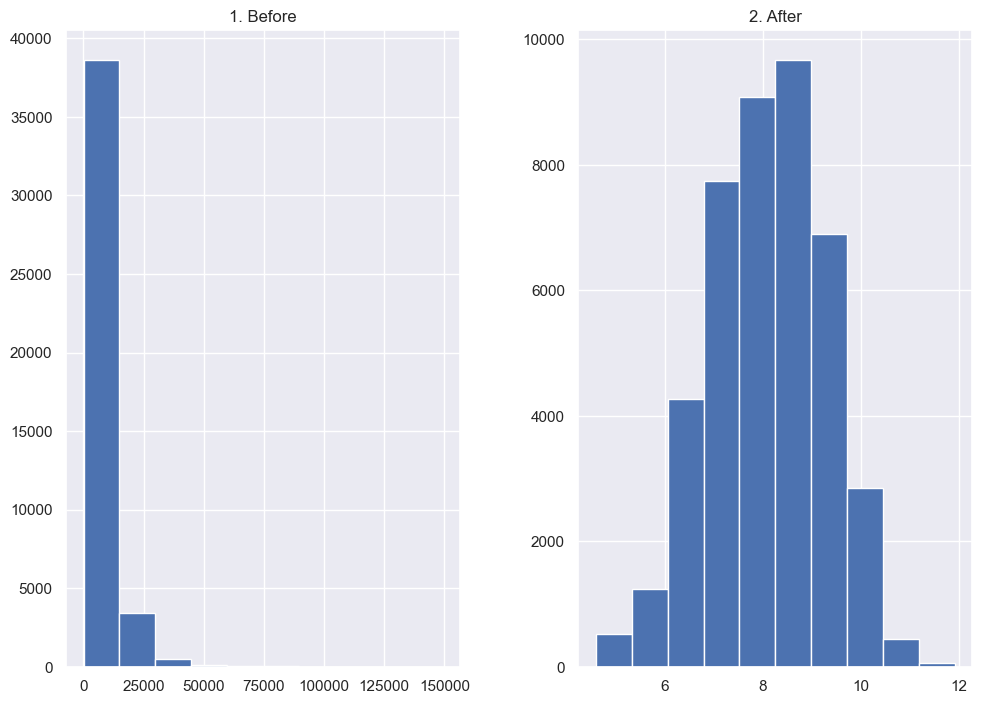

In [66]:
# Plotting the variable price
prices = pd.DataFrame({"1. Before":y2, "2. After":np.log(y2)})
prices.hist()

In [67]:
# Transforming price as a logarithmic value
y2 = np.log(y2)


In [68]:
# Splitting data into test and train
X_train1, X_test1, y_train1, y_test1 = train_test_split(x2, y2, test_size=0.3, random_state = 3)
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)


(29940, 303) (12832, 303) (29940,) (12832,)


In [69]:
# BASELINE MODEL FOR IMPUTED DATA
# =============================================================================

"""
We are making a base model by using test data mean value
This is to set a benchmark and to compare with our regression model
"""


'\nWe are making a base model by using test data mean value\nThis is to set a benchmark and to compare with our regression model\n'

In [70]:
# finding the mean for test data value
base_pred = np.mean(y_test1)
print(base_pred)


8.068391740519065


In [71]:
# Repeating same value till length of test data
base_pred = np.repeat(base_pred, len(y_test1))


In [72]:
# finding the RMSE
base_root_mean_square_error_imputed = np.sqrt(mean_squared_error(y_test1, base_pred))
                               
print(base_root_mean_square_error_imputed)

# ==============

1.1884349112889792


In [73]:
# LINEAR REGRESSION WITH IMPUTED DATA

In [74]:
# Setting intercept as true
lgr2=LinearRegression(fit_intercept=True)


In [75]:
# Model
model_lin2=lgr2.fit(X_train1,y_train1)


In [76]:
# Predicting model on test set
cars_predictions_lin2 = lgr2.predict(X_test1)


In [77]:
# Computing MSE and RMSE
lin_mse2 = mean_squared_error(y_test1, cars_predictions_lin2)
lin_rmse2 = np.sqrt(lin_mse2)
print(lin_rmse2)


0.6483956449231298


In [78]:
# R squared value
r2_lin_test2=model_lin2.score(X_test1,y_test1)
r2_lin_train2=model_lin2.score(X_train1,y_train1)
print(r2_lin_test2,r2_lin_train2)


0.7023339008631182 0.7071658736894363


In [79]:
# RANDOM FOREST WITH IMPUTED DATA

In [80]:
# Model parameters
rf2 = RandomForestRegressor(n_estimators = 100,max_features='auto',
                           max_depth=100,min_samples_split=10,
                           min_samples_leaf=4,random_state=1)


In [81]:
# Model
model_rf2=rf2.fit(X_train1,y_train1)


In [82]:
# Predicting model on test set
cars_predictions_rf2 = rf2.predict(X_test1)


In [83]:
# Computing MSE and RMSE
rf_mse2 = mean_squared_error(y_test1, cars_predictions_rf2)
rf_rmse2 = np.sqrt(rf_mse2)
print(rf_rmse2)


0.494313994408829


In [84]:
# R squared value
r2_rf_test2=model_rf2.score(X_test1,y_test1)
r2_rf_train2=model_rf2.score(X_train1,y_train1)
print(r2_rf_test2,r2_rf_train2)                            


0.8269964521311131 0.9024289431669166


In [85]:
# Final output

print("Metrics for models built from data where missing values were omitted")
print("R squared value for train from Linear Regression=  %s"% r2_lin_train1)
print("R squared value for test from Linear Regression=  %s"% r2_lin_test1)
print("R squared value for train from Random Forest=  %s"% r2_rf_train1)
print("R squared value for test from Random Forest=  %s"% r2_rf_test1)
print("Base RMSE of model built from data where missing values were omitted= %s"%base_root_mean_square_error)
print("RMSE value for test from Linear Regression=  %s"% lin_rmse1)
print("RMSE value for test from Random Forest=  %s"% rf_rmse1)
print("\n\n")
print("Metrics for models built from data where missing values were imputed")
print("R squared value for train from Linear Regression=  %s"% r2_lin_train2)
print("R squared value for test from Linear Regression=  %s"% r2_lin_test2)
print("R squared value for train from Random Forest=  %s"% r2_rf_train2)
print("R squared value for test from Random Forest=  %s"% r2_rf_test2)
print("Base RMSE of model built from data where missing values were imputed= %s"%base_root_mean_square_error_imputed)
print("RMSE value for test from Linear Regression=  %s"% lin_rmse2)
print("RMSE value for test from Random Forest=  %s"% rf_rmse2)



Metrics for models built from data where missing values were omitted
R squared value for train from Linear Regression=  0.7800936978183916
R squared value for test from Linear Regression=  0.7658615091649262
R squared value for train from Random Forest=  0.9202494705146291
R squared value for test from Random Forest=  0.8504018147750623
Base RMSE of model built from data where missing values were omitted= 1.1274483657478247
RMSE value for test from Linear Regression=  0.5455481266513819
RMSE value for test from Random Forest=  0.4360736289370223



Metrics for models built from data where missing values were imputed
R squared value for train from Linear Regression=  0.7071658736894363
R squared value for test from Linear Regression=  0.7023339008631182
R squared value for train from Random Forest=  0.9024289431669166
R squared value for test from Random Forest=  0.8269964521311131
Base RMSE of model built from data where missing values were imputed= 1.1884349112889792
RMSE value for te